In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My Drive/PROJECT - NLP/semantic-segmentation/data/text/files

/content/drive/My Drive/PROJECT - NLP/semantic-segmentation/data/text/files


In [0]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [0]:
import os
import io
import re
import pandas as pd

In [0]:
sent = []
classes = []
sent1 = []
sent2 = []
sent3 = []

for filename in os.listdir():
  with io.open(filename,'r') as f:
    file = f.read()
  for i in range(len(file.split('\n'))):
    if len(file.split('\n')[i].split('\t')) == 2:
      s = file.split('\n')[i].split('\t')[0]
      s1 = re.sub(r'[^\w\s]','',s)
      sent.append(s)
      sent3.append(s1)
      doc = nlp(s)
      for X in doc.ents:
        s = s.replace(X.text,X.label_)
      sent1.append(s.replace(X.text,X.label_))
      classes.append(file.split('\n')[i].split('\t')[1])

dic = {'Sentence':sent,'Sent_NER':sent1,'Class':classes}
df = pd.DataFrame(dic)
dic = {'Sentence':sent,'Sent_Without_Pun':sent3,'Class':classes}
df2 = pd.DataFrame(dic)

In [0]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(classes)

LabelEncoder()

In [0]:
enc.classes_

array(['Argument', 'Facts', 'Precedent', 'Ratio of the decision',
       'Ruling by Lower Court', 'Ruling by Present Court', 'Statute'],
      dtype='<U23')

In [0]:
classes = enc.transform(classes)

In [0]:
df = pd.concat([df,pd.DataFrame(list(classes))],axis = 1)

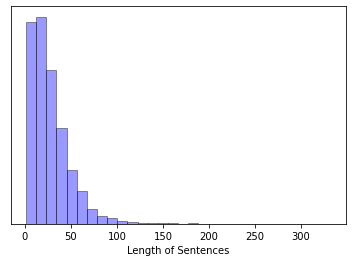

In [0]:
max_len = []
for X in df['Sentence']:
  max_len.append(len(X.split()))
import seaborn as sns
ax = sns.distplot(max_len, hist=True, kde=False,bins=int(30), color = 'blue',hist_kws={'edgecolor':'black'})
ax.set(xlabel="Length of Sentences", ylabel = "Number of Sentences")
ax.axes.get_yaxis().set_visible(False)
#ax.axes.get_xaxis().set_visible(False)

In [0]:
for X in df['Sentence']:
  max_len.append(len(X.split()))

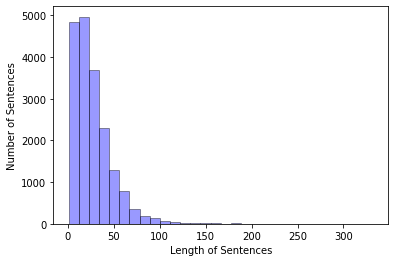

In [0]:
import seaborn as sns
ax = sns.distplot(max_len, hist=True, kde=False,bins=int(30), color = 'blue',hist_kws={'edgecolor':'black'})
ax.set(xlabel="Length of Sentences", ylabel = "Number of Sentences")
#ax.axes.get_yaxis().set_visible(False)
#ax.axes.get_xaxis().set_visible(False)
fig = ax.get_figure()
fig.savefig("/content/drive/My Drive/PROJECT - NLP/semantic-segmentation/output.png")

In [0]:
isLong = []
for X in df['Sent_NER']:
  if len(X.split()) >= 130:
    isLong.append(True)
  else:
    isLong.append(False)
df['isLong'] = pd.DataFrame(isLong)

In [0]:
df.columns = ['Sentence','Sent_NER','Classes','Label','isLong']

In [0]:
df = pd.read_csv('file2.csv')

In [0]:
num = df['Classes'].value_counts().to_frame()
num.columns = ['Number of Sentences']

In [0]:
num

,Number of Sentences
Ratio of the decision,3624
Facts,2219
Precedent,1468
Argument,844
Statute,646
Ruling by Lower Court,315
Ruling by Present Court,262


In [0]:
sent = []
classes = []
fil1 = []

for filename in os.listdir():
  with io.open(filename,'r') as f:
    file = f.read()
  for i in range(len(file.split('\n'))):
    if len(file.split('\n')[i].split('\t')) == 2:
      s = file.split('\n')[i].split('\t')[0]
      sent.append(s)
      classes.append(file.split('\n')[i].split('\t')[1])
      fil1.append(filename)

dic = {'Sentence':sent,'filename':fil1,'Class':classes}
df = pd.DataFrame(dic)

In [0]:
df = pd.read_csv('file3.csv')

In [0]:
%cd ./pretrained-embeddings

/content/drive/My Drive/PROJECT - NLP/semantic-segmentation/data/text/pretrained-embeddings


In [0]:
df

,Unnamed: 0,Sentence,filename,Class
0,0,This appeal with special leave is directed aga...,1954_M_25.txt,Facts
1,1,During the year 1948 the appellant made a prof...,1954_M_25.txt,Facts
2,2,"11,97,648-11-9",1954_M_25.txt,Facts
3,3,It paid 24 3 per cent,1954_M_25.txt,Facts
4,4,"dividend on ordinary shares, being the maximum...",1954_M_25.txt,Facts
...,...,...,...,...
9373,9373,We find no infirmity in the impugned order pas...,2015_S_368.txt,Ruling by Present Court
9374,9374,"Hence,this appeal has no merit which is accord...",2015_S_368.txt,Ruling by Present Court
9375,9375,"Before parting with the order,we must make it ...",2015_S_368.txt,Ruling by Present Court
9376,9376,The parties may prosecute their remedies in Ci...,2015_S_368.txt,Ruling by Present Court


In [0]:
for filename in os.listdir():
  with io.open('./'+filename,"r") as f:
    fi = f.read()
  l = fi.split('\n')
  print(filename)
  print(len(l))
  c = list(df[df['filename'] == filename]['Class'])
  print(len(c))
  for i in range(len(l)-1):
    l[i] = l[i]+'\t'+c[i]
  x = "\n".join(l)
  with open('./'+filename,"r+") as f:
    f.truncate(0)
    f.write(x)

1954_M_25.txt
131
130
1996_T_169.txt
121
120
1971_S_1.txt
237
236
1978_M_13.txt
80
79
1976_T_9.txt
157
156
1994_M_69.txt
135
134
1977_P_19.txt
96
95
1987_C_108.txt
472
471
1980_W_3.txt
206
205
1963_S_59.txt
659
658
1994_S_246.txt
162
161
1973_S_68.txt
148
147
1989_A_55.txt
127
126
1996_B_72.txt
99
98
1953_S_23.txt
152
151
1987_M_123.txt
168
167
1953_L_1.txt
181
180
1987_S_26.txt
215
214
1995_S_317.txt
168
167
2005_S_388.txt
116
115
2014_R_41.txt
175
174
2008_C_166.txt
160
159
2000_V_80.txt
114
113
2014_J_33.txt
174
173
2007_C_121.txt
250
249
2008_S_549.txt
103
102
2006_A_36.txt
164
163
2011_I_16.txt
253
252
2001_S_1131.txt
174
173
2007_B_76.txt
128
127
2010_S_431.txt
134
133
2015_J_10.txt
141
140
2006_A_136.txt
429
428
2007_S_632.txt
175
174
2001_A_234.txt
170
169
2004_C_129.txt
200
199
2008_A_260.txt
153
152
2009_S_146.txt
323
322
2008_I_54.txt
147
146
2004_I_24.txt
272
271
2008_P_8.txt
235
234
